Epoch 1/100
413/413 [==============================] - 1s 2ms/step - loss: 32506368000.0000 - val_loss: 7982416384.0000
Epoch 2/100
413/413 [==============================] - 1s 2ms/step - loss: 6291751936.0000 - val_loss: 5388748800.0000
Epoch 3/100
413/413 [==============================] - 1s 2ms/step - loss: 5159094784.0000 - val_loss: 4957574656.0000
Epoch 4/100
413/413 [==============================] - 1s 2ms/step - loss: 4938741248.0000 - val_loss: 4814674432.0000
Epoch 5/100
413/413 [==============================] - 1s 2ms/step - loss: 4869843968.0000 - val_loss: 4757385728.0000
Epoch 6/100
413/413 [==============================] - 1s 2ms/step - loss: 4781143552.0000 - val_loss: 4743083008.0000
Epoch 7/100
413/413 [==============================] - 1s 2ms/step - loss: 4662935552.0000 - val_loss: 4678505472.0000
Epoch 8/100
413/413 [==============================] - 1s 2ms/step - loss: 4670616064.0000 - val_loss: 4662127104.0000
Epoch 9/100
413/413 [==========================

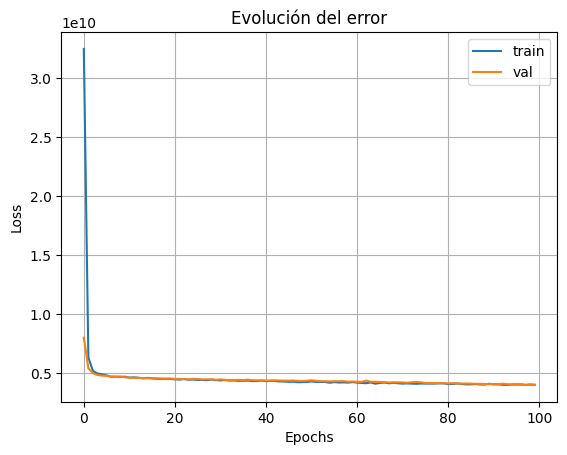

In [2]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from preprocessing import get_preprocessor
from tensorflow import keras
import matplotlib.pyplot as plt

# Cargar datos
housing = pd.read_csv("housing.csv")

# Separar X e y
X = housing.drop("median_house_value", axis=1)
y = housing["median_house_value"].copy()

# División
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Preprocesamiento con imputación y escalado
preprocessor = get_preprocessor(housing)
X_train_prep = preprocessor.fit_transform(X_train)
X_valid_prep = preprocessor.transform(X_valid)
X_test_prep = preprocessor.transform(X_test)

# Crear modelo mejorado
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=X_train_prep.shape[1]),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="mean_squared_error", optimizer=optimizer)

# EarlyStopping
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# Entrenar modelo
history = model.fit(X_train_prep, y_train, epochs=100,
                    validation_data=(X_valid_prep, y_valid),
                    callbacks=[early_stopping_cb])

# Evaluar
y_pred = model.predict(X_valid_prep)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print("RMSE validación:", rmse)


# Predecir sobre test
y_test_pred = model.predict(X_test_prep)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("✅ RMSE test:", rmse_test)




# Visualización
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.title("Evolución del error")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()
